In [1478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [1479]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mridul.miglani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1480]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mridul.miglani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1481]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mridul.miglani\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [1482]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTEN

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import re

#### Import the data

In [1483]:
data = pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

In [1484]:
data

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,7/4/2017 0:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,7/4/2017 0:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,7/5/2017 0:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,7/6/2017 0:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [1485]:
data.size

4675

In [1486]:
data.shape

(425, 11)

#### Dataset has 11 fields and 425 rows of accidents.

In [1487]:
data.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

In [1488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [1489]:
df = pd.DataFrame(data)

In [1490]:
df_copy = df
df_copy.drop(columns='Description').describe(exclude=[np.number]).T

,count,unique,top,freq
Data,425,287,2/8/2017 0:00,6
Countries,425,3,Country_01,251
Local,425,12,Local_03,90
Industry Sector,425,3,Mining,241
Accident Level,425,5,I,316
Potential Accident Level,425,6,IV,143
Genre,425,2,Male,403
Employee or Third Party,425,3,Third Party,189
Critical Risk,425,33,Others,232


In [1491]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


#### Data cleansing

In [1492]:
# This field can be dropped
df = df.drop(['Unnamed: 0'], axis=1)

In [1493]:
df.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

#### No nulls are present in any column

In [1494]:
dup = df.duplicated()
df[dup]

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
77,4/1/2016 0:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,12/1/2016 0:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,1/21/2017 0:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,3/2/2017 0:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,3/2/2017 0:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,3/15/2017 0:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,5/23/2017 0:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


#### Total 7 records are duplicate

In [1495]:
# Dropping the duplicate rows
df = df.drop_duplicates()

In [1496]:
df.shape

(418, 10)

#### After dropping duplicates, 418 rows remain

In [1497]:
df.dtypes

Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

In [1498]:
#Convert data column from object to date type and remove timestamps from date column

In [1499]:
df['Data'] = pd.to_datetime(df['Data'])

In [1500]:
#rename columns
df.rename({'Data': 'Date', 'Genre': 'Gender', 'Industry Sector': 'Industry_Sector', 'Accident Level': 'Accident_Level',
           'Potential Accident Level': 'Potential_Accident_Level', 'Employee or Third Party':'Employee_or_Third_Party',
           'Critical Risk': 'Critical_Risk'}, axis=1, inplace=True)

In [1501]:
df.columns

Index(['Date', 'Countries', 'Local', 'Industry_Sector', 'Accident_Level',
       'Potential_Accident_Level', 'Gender', 'Employee_or_Third_Party',
       'Critical_Risk', 'Description'],
      dtype='object')

In [1502]:
df['Date'] = df['Date'].dt.date

In [1503]:
# Now extracting year, month and date from 'Date' column
df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)

In [1504]:
df.head()

,Date,Countries,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_or_Third_Party,Critical_Risk,Description,Year,Month,Day
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10


#### Step 3: Data preprocessing and EDA

In [1505]:
#Label encoding

In [1506]:
# Manually encoded Accident_Level labels for proper interpretation

#### Manually encoded Accident_Level labels for proper interpretation

In [1507]:
accident_level_labels = {'I':1, 'II':2, 'III':3, 'IV':4, 'V':5}

In [1508]:
df['Accident_Level'] = df['Accident_Level'].map(accident_level_labels)

In [1509]:
p_accident_level_labels = {'I':1, 'II':2, 'III':3, 'IV':4, 'V':5, 'VI':6}

In [1510]:
df['Potential_Accident_Level'] = df['Potential_Accident_Level'].map(p_accident_level_labels)

In [1511]:
df.dtypes

Date                        object
Countries                   object
Local                       object
Industry_Sector             object
Accident_Level               int64
Potential_Accident_Level     int64
Gender                      object
Employee_or_Third_Party     object
Critical_Risk               object
Description                 object
Year                         int64
Month                        int64
Day                          int64
dtype: object

Both accident_level columns now converted to integer

In [1512]:
# Checking the Correlation
df.corr()

,Accident_Level,Potential_Accident_Level,Year,Month,Day
Accident_Level,1.000000,0.509422,0.043065,0.025572,-0.008689
Potential_Accident_Level,0.509422,1.000000,0.021809,-0.066601,0.004030
Year,0.043065,0.021809,1.000000,-0.416621,-0.001982
Month,0.025572,-0.066601,-0.416621,1.000000,0.002133
Day,-0.008689,0.004030,-0.001982,0.002133,1.000000


#### There appears to be decent level of correlation between Accident Level and Potential Accident level.

### Trends by date, month and year

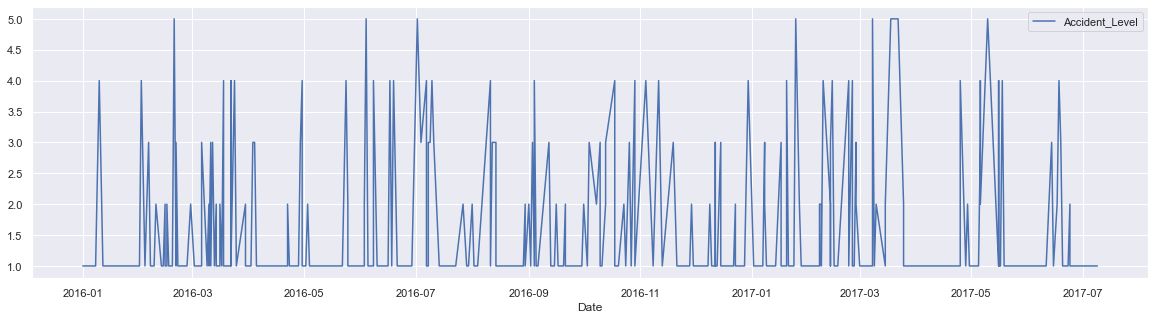

In [1513]:
#Trend of accident_levels by date
df.plot(x='Date', y='Accident_Level', figsize=(20,5), kind='line')

#### A few dates in 2016 March, June, July and 2017 Feb, March, May have occurance of severe accident levels.

In [1514]:
#Observe count of all accident types by Year
yearly_trend = df.pivot_table(index='Year', columns= ['Accident_Level'], aggfunc='count')['Date']

In [1515]:
yearly_trend.replace(np.nan,0,inplace=True)

In [1516]:
#Yearly accidents pivot
yearly_trend

Accident_Level,1,2,3,4,5
Year,,,,,
2016,211,26,24,19,3
2017,98,14,7,11,5


#### More accidents have occured in 2016 for all the categories except level 5.
#### Level 1, 2 and 4 accidents are almost twice in 2016 as compared to 2017.
#### Level 3 accidents are almost thrice in 2016 as compared to 2017.


In [1517]:
#Observe count of all accident types by Month
monthly_trend = df.pivot_table(index='Month', columns=[ 'Year','Accident_Level'], aggfunc='count')['Date']

In [1518]:
monthly_trend.replace(np.nan,0,inplace=True)

In [1519]:
#monthly accident counts pivot
monthly_trend

Year            2016                      2017                    
Accident_Level     1    2    3    4    5     1    2    3    4    5
Month                                                             
1               11.0  0.0  0.0  1.0  0.0  21.0  2.0  2.0  1.0  1.0
2               23.0  4.0  2.0  1.0  1.0  19.0  5.0  2.0  4.0  0.0
3               24.0  4.0  3.0  3.0  0.0  10.0  3.0  0.0  0.0  3.0
4               23.0  1.0  3.0  1.0  0.0  20.0  1.0  0.0  2.0  0.0
5               23.0  2.0  0.0  1.0  0.0   8.0  1.0  1.0  3.0  1.0
6               26.0  1.0  0.0  3.0  1.0  15.0  2.0  2.0  1.0  0.0
7               11.0  1.0  4.0  2.0  1.0   5.0  0.0  0.0  0.0  0.0
8               15.0  3.0  2.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0
9               18.0  3.0  2.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0
10              11.0  4.0  4.0  2.0  0.0   0.0  0.0  0.0  0.0  0.0
11               9.0  1.0  1.0  2.0  0.0   0.0  0.0  0.0  0.0  0.0
12              17.0  2.0  3.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0

#### Level 1 accidents have frquent occurance accross all months for both the years.
#### Occurance of Level 5 accidents is very less frequent.

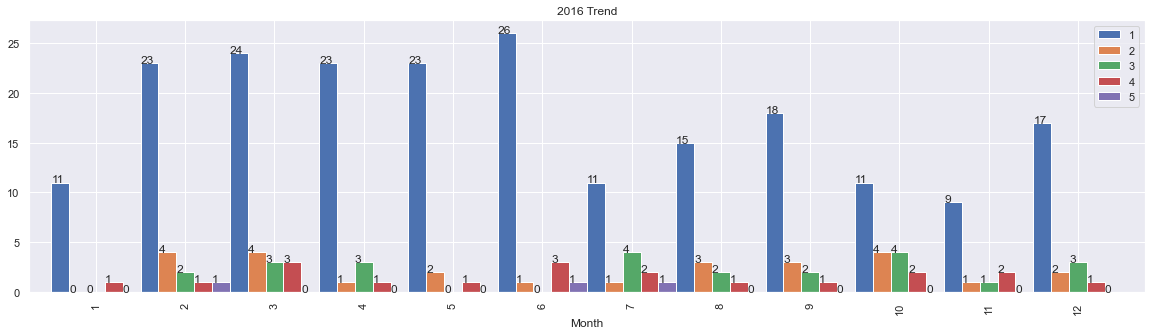

In [1520]:
plot = monthly_trend[2016].plot(kind='bar', figsize=(20,5), width = 1, title='2016 Trend')
plt.legend(loc=1)

for i in plot.patches:
    plot.annotate('{:.0f}'.format(i.get_height()), (i.get_x(), i.get_height()))

#### For 2016, Level 1 accident counts are higher for Jan to June months and all accident levels are reducing towards year end.

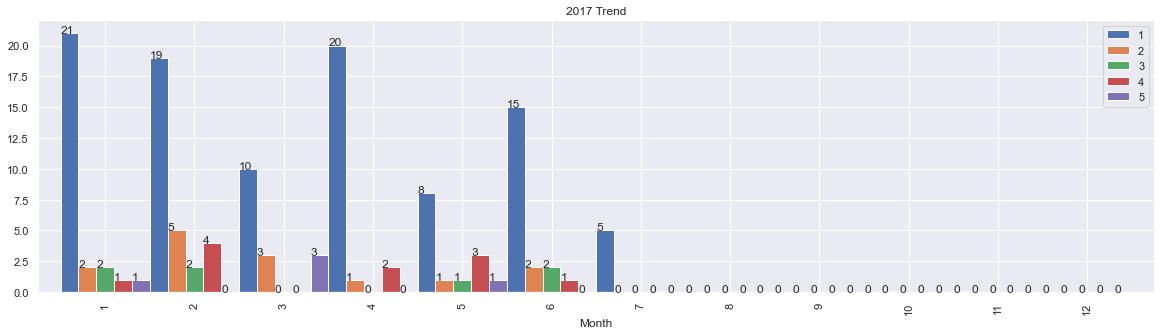

In [1521]:
plot = monthly_trend[2017].plot(kind='bar', figsize=(20,5), width = 1, title='2017 Trend')
plt.legend(loc=1)

for i in plot.patches:
    plot.annotate('{:.0f}'.format(i.get_height()), (i.get_x(), i.get_height()))

### Univariate Analysis

In [1522]:
#Check counts of all data points in columns

In [1523]:
df['Accident_Level'].value_counts()

1    309
2     40
3     31
4     30
5      8
Name: Accident_Level, dtype: int64

In [1524]:
df['Accident_Level'].value_counts()/df.shape[0]*100

1    73.923445
2     9.569378
3     7.416268
4     7.177033
5     1.913876
Name: Accident_Level, dtype: float64

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


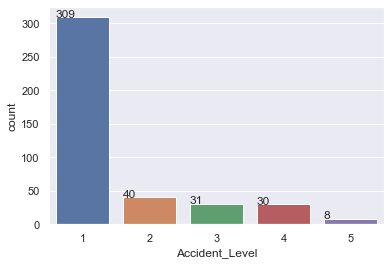

In [1525]:
plot = sns.countplot(df['Accident_Level']);
for i in plot.patches:
    plot.annotate('{}'.format(i.get_height()), (i.get_x(), i.get_height()))

#### Level 5 accident levels are only 2% and Level 1 accidents are almost 74% of total.

In [1526]:
df['Countries'].value_counts()

Country_01    248
Country_02    129
Country_03     41
Name: Countries, dtype: int64

In [1527]:
df['Countries'].value_counts()/df.shape[0]*100

Country_01    59.330144
Country_02    30.861244
Country_03     9.808612
Name: Countries, dtype: float64

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


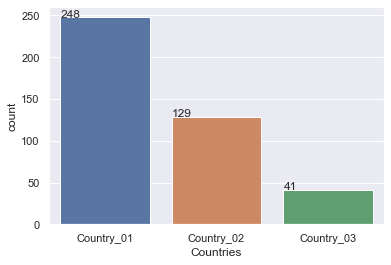

In [1528]:
plot = sns.countplot(df['Countries']);
for i in plot.patches:
    plot.annotate('{}'.format(i.get_height()), (i.get_x(), i.get_height()))

#### Majority of accidents occured in Country_01 (almost 60%) and lowest in Country_02 (almost 10%)

In [1529]:
df['Local'].value_counts()

Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

In [1530]:
df['Local'].value_counts()/df.shape[0]*100

Local_03    21.291866
Local_05    14.114833
Local_01    13.397129
Local_04    13.157895
Local_06    11.004785
Local_10     9.808612
Local_08     6.459330
Local_02     5.502392
Local_07     3.349282
Local_12     0.956938
Local_09     0.478469
Local_11     0.478469
Name: Local, dtype: float64

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


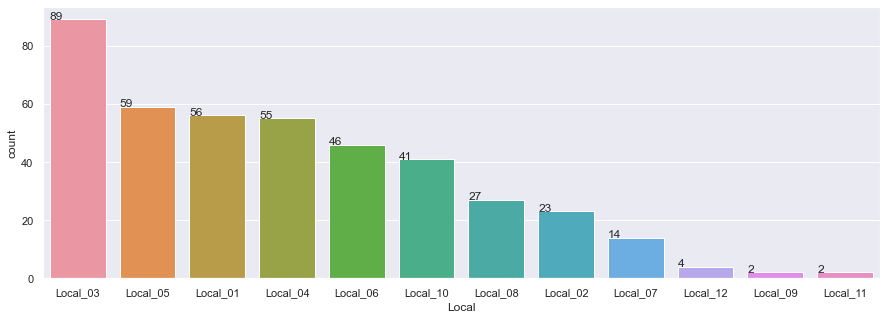

In [1531]:
fig= plt.figure(figsize=(15,5))
plot = sns.countplot(df['Local'], order = df['Local'].value_counts().index);
for i in plot.patches:
    plot.annotate('{}'.format(i.get_height()), (i.get_x(), i.get_height()))

#### Sites which encoutered most accidents are Local_03, 05, 01, 04, 06 and 10 in decreasing order.
#### Site_03 alone contributes 21% of accidents/
#### Site_01, Site_05 and Site_01 together have seen almost 50% of all accidents.

In [1532]:
df['Industry_Sector'].value_counts()

Mining    237
Metals    134
Others     47
Name: Industry_Sector, dtype: int64

In [1533]:
df['Industry_Sector'].value_counts()/df.shape[0]

Mining    0.566986
Metals    0.320574
Others    0.112440
Name: Industry_Sector, dtype: float64

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


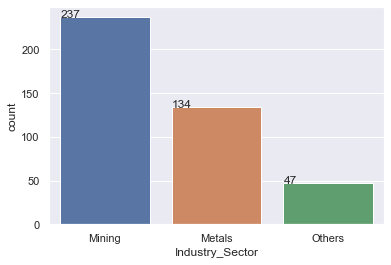

In [1534]:
plot = sns.countplot(df['Industry_Sector']);
for i in plot.patches:
    plot.annotate('{}'.format(i.get_height()), (i.get_x(), i.get_height()))

#### Mining sector is most prone to Industrial accidents followed by Metals sector.

In [1535]:
df['Gender'].value_counts()

Male      396
Female     22
Name: Gender, dtype: int64

In [1536]:
df['Gender'].value_counts()/df.shape[0]*100

Male      94.736842
Female     5.263158
Name: Gender, dtype: float64

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


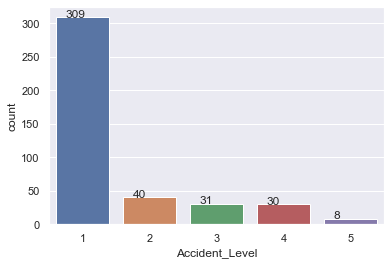

In [1537]:
plot = sns.countplot(df['Accident_Level'])
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.04))

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


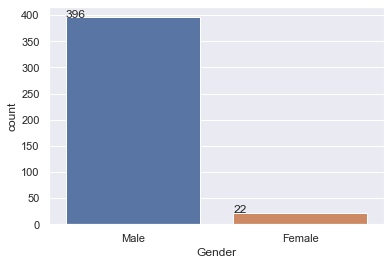

In [1538]:
plot = sns.countplot(df['Gender']);
for i in plot.patches:
    plot.annotate('{}'.format(i.get_height()), (i.get_x(), i.get_height()))

#### Most of the workers are males who encountered industry accidents.
#### Female workers only account for 5% of all workers.

In [1539]:
df['Critical_Risk'].value_counts()

Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Electrical Shock    

In [1540]:
df['Critical_Risk'].value_counts()/df.shape[0]*100

Others                                       54.784689
Pressed                                       5.741627
Manual Tools                                  4.784689
Chemical substances                           4.066986
Cut                                           3.349282
Venomous Animals                              3.110048
Projection                                    3.110048
Bees                                          2.392344
Fall                                          2.153110
Vehicles and Mobile Equipment                 1.913876
Fall prevention (same level)                  1.674641
remains of choco                              1.674641
Pressurized Systems                           1.674641
Fall prevention                               1.435407
Suspended Loads                               1.435407
Blocking and isolation of energies            0.717703
Pressurized Systems / Chemical Substances     0.717703
Power lock                                    0.717703
Liquid Met

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


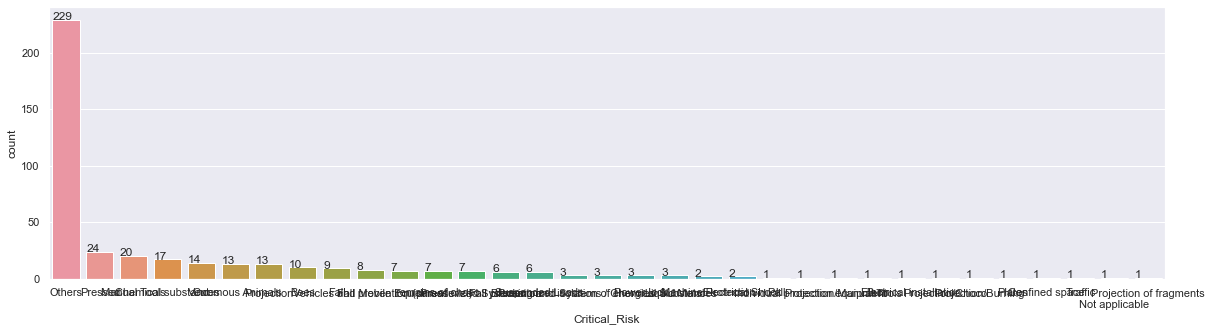

In [1541]:
plt.figure(figsize= (20,5))
plot = sns.countplot(df['Critical_Risk'], order = df['Critical_Risk'].value_counts().index);
for i in plot.patches:
    plot.annotate('{}'.format(i.get_height()), (i.get_x(), i.get_height()))
    #plot.set_xticklabels(labels=df['Critical_Risk'], rotation=45)

#### Most of the accident risks are categorized as 'Others' wrt Critical Risk.
#### Some important categories are Pressed, Manual Tools and Chemical substances.

In [1542]:
critical_risk_pivot=df.pivot_table(index='Critical_Risk', columns='Accident_Level', aggfunc='count')['Month']
critical_risk_pivot.replace(np.nan, 0, inplace=True)
critical_risk_pivot['total']=critical_risk_pivot.sum(axis=1)

In [1543]:
critical_risk_pivot.style.background_gradient()

Accident_Level,1,2,3,4,5,total
Critical_Risk,,,,,,
Not applicable,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Bees,10.000000,0.000000,0.000000,0.000000,0.000000,10.000000
Blocking and isolation of energies,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000
Burn,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
Chemical substances,15.000000,2.000000,0.000000,0.000000,0.000000,17.000000
Confined space,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Cut,11.000000,2.000000,1.000000,0.000000,0.000000,14.000000
Electrical Shock,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
Electrical installation,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000


#### All accident levels have highest occurance under 'Others' critical risk category.

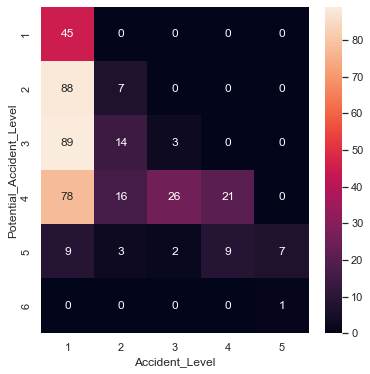

In [1544]:
freq_matrix = pd.crosstab(df['Potential_Accident_Level'], df['Accident_Level'])
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(freq_matrix, ax=ax, annot=True)

#### Frequency is high for Accident Level 1 and  Potential Accident Level 1,2,3,4

### Bivariate Analysis

In [1545]:
order={1:1, 2:2, 3:3, 4:4, 5:5}

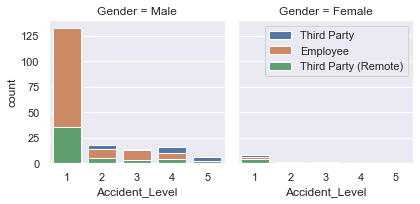

In [1546]:
grid = sns.FacetGrid(df, col = 'Gender', hue='Employee_or_Third_Party', legend_out=True)
grid.map(sns.countplot, 'Accident_Level', order=order)
plt.legend(loc=1)

#### For males, most accidents are for Employees, then third party and leas for third party remote (due to obvious reasons as they are very less exposed to vulnerable working conditions)

#### Female employees have majorly level 1 accidents and more are employee and third party.

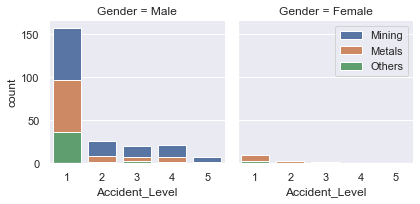

In [1547]:
grid = sns.FacetGrid(df, col = 'Gender', hue='Industry_Sector', legend_out=True)
grid.map(sns.countplot, 'Accident_Level', order=order)
plt.legend(loc=1)

#### For males, accidents are high in both Mining and metals sector (highest in mining).
#### For females, accidents are more in metals sector (reason could also be due less females working in Mining sector).

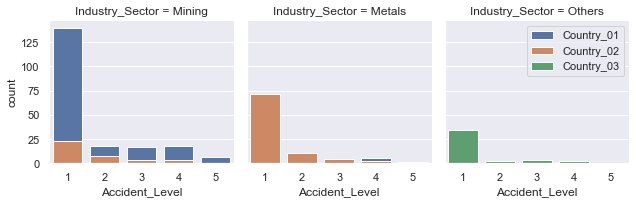

In [1548]:
grid = sns.FacetGrid(df, col = 'Industry_Sector', hue='Countries', legend_out=True)
axis = grid.map(sns.countplot, 'Accident_Level', order=order)
plt.legend(loc=1)

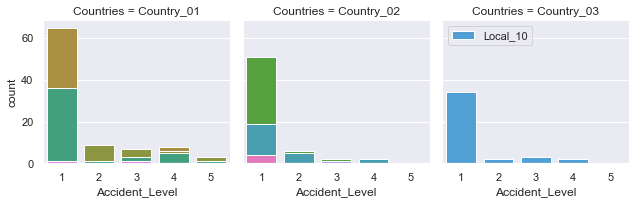

In [1549]:
grid = sns.FacetGrid(df, col = 'Countries', hue='Local', legend_out=True)
axis = grid.map(sns.countplot, 'Accident_Level', order=order)
plt.legend(loc=2)

#### Country_01 has highest accidents for all levels in Mining. Could be due to presence of more mining sites in Country_01.
#### Country_02 has high occurance of Level 1 accidents and no occurane of Level 5.
#### Country_03 has also has moderate occurances of Level 1 accidents.

### NLP Pre-Processing

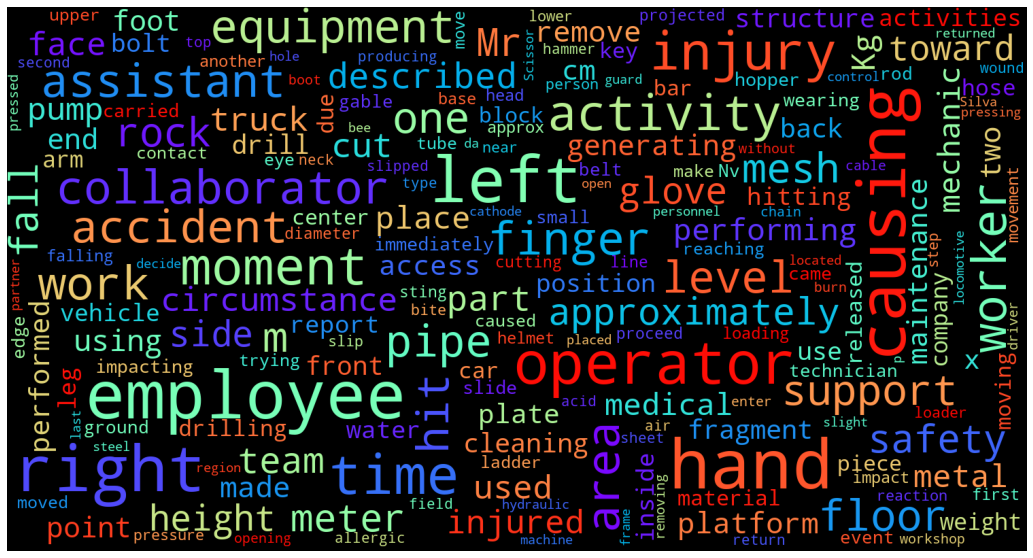

In [1550]:
#Word Cloud
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1500, height = 800, random_state=0, colormap='rainbow', 
                      min_font_size=5, max_font_size = 100, max_words=200, collocations=False).generate(" ".join(df['Description'].values))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Commonly occuring words are:

* Type of action: Causing, opening, fall, drilling, used, support, cut, remove, cleaning, moving, slide, slip, released
* Body parts, position/ direction, equipment: finger, glove, hand, leg, foot, left, right, helmet
* Machine part / type: Hydraulic, pump, bolt, ladder, truck, vehicle, cathode, collaborator, belt, plate
* Impact type: Sting bite, injured, burn, pressed, allergic
* Type of role: Operator, technician

In [1551]:
# Get min and max length of descriptions
df['Length'] = df['Description'].str.len()

print('Minimum line length: {}'.format(df['Length'].min()))
print('Maximum line length: {}'.format(df['Length'].max()))

Minimum line length: 94
Maximum line length: 1029


#### Shortest description has 94 words and longest description has 1029 words.

In [1552]:
df['Length'].describe()

count     418.000000
mean      365.413876
std       177.686933
min        94.000000
25%       225.500000
50%       334.000000
75%       453.000000
max      1029.000000
Name: Length, dtype: float64

#### Mean description length is 365 words and median length is 334.

In [1553]:
# Combining critical risk and descirption as Critical Risk can be considered as a category/ tag associated with Description

In [1554]:
df['Description_combined'] = df['Critical_Risk'] + ' ' + df['Description']

In [1555]:
df['Description_combined']

0      Pressed While removing the drill rod of the Ju...
1      Pressurized Systems During the activation of a...
2      Manual Tools In the sub-station MILPO located ...
3      Others Being 9:45 am. approximately in the Nv....
4      Others Approximately at 11:45 a.m. in circumst...
                             ...                        
420    Others Being approximately 5:00 a.m. approxima...
421    Others The collaborator moved from the infrast...
422    Venomous Animals During the environmental moni...
423    Cut The Employee performed the activity of str...
424    Fall prevention (same level) At 10:00 a.m., wh...
Name: Description_combined, Length: 418, dtype: object

In [1556]:
df.head()

,Date,Countries,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_or_Third_Party,Critical_Risk,Description,Year,Month,Day,Length,Description_combined
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,457,Pressed While removing the drill rod of the Ju...
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,307,Pressurized Systems During the activation of a...
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,314,Manual Tools In the sub-station MILPO located ...
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,562,Others Being 9:45 am. approximately in the Nv....
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,487,Others Approximately at 11:45 a.m. in circumst...


#### Remove unwanted columns. Our input column will be Description (including Critical Risk) and target variable will be Accident Level

In [1557]:
df

,Date,Countries,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_or_Third_Party,Critical_Risk,Description,Year,Month,Day,Length,Description_combined
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,457,Pressed While removing the drill rod of the Ju...
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,307,Pressurized Systems During the activation of a...
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,314,Manual Tools In the sub-station MILPO located ...
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,562,Others Being 9:45 am. approximately in the Nv....
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,487,Others Approximately at 11:45 a.m. in circumst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04,Country_01,Local_04,Mining,1,3,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,4,220,Others Being approximately 5:00 a.m. approxima...
421,2017-07-04,Country_01,Local_03,Mining,1,2,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,4,219,Others The collaborator moved from the infrast...
422,2017-07-05,Country_02,Local_09,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,5,251,Venomous Animals During the environmental moni...
423,2017-07-06,Country_02,Local_05,Metals,1,2,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,6,187,Cut The Employee performed the activity of str...


In [1558]:
df.drop(['Date', 'Countries','Local','Industry_Sector','Potential_Accident_Level','Gender','Employee_or_Third_Party',
         'Critical_Risk','Year','Month','Day'], axis=1, inplace=True)

In [1559]:
df.head()

,Accident_Level,Description,Length,Description_combined
0,1,While removing the drill rod of the Jumbo 08 f...,457,Pressed While removing the drill rod of the Ju...
1,1,During the activation of a sodium sulphide pum...,307,Pressurized Systems During the activation of a...
2,1,In the sub-station MILPO located at level +170...,314,Manual Tools In the sub-station MILPO located ...
3,1,Being 9:45 am. approximately in the Nv. 1880 C...,562,Others Being 9:45 am. approximately in the Nv....
4,4,Approximately at 11:45 a.m. in circumstances t...,487,Others Approximately at 11:45 a.m. in circumst...


In [1560]:
#df['description_updated'] = df['Description'].apply(lambda x : x.lower())

In [1561]:
#df['description_updated'] = df['Description'].apply(lambda x : x.strip())

In [1562]:
#w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#lemmatizer = WordNetLemmatizer()

#def lemmatize_text(text):
#    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [1563]:
#df['description_updated'] = df['description_updated'].apply(lemmatize_text)
#print(df['description_updated'])

#### NLP pre-processing

In [1564]:
#Apply lemmatization to use same root word for variations of similar word.

In [1565]:
#Remove special characters.

In [1566]:
#Apply lower to make string case lower for consistency

In [1567]:
#Apply trim to remove leading and trailing spaces. Replace double spaces with single space.

In [1568]:
lemmatizer = WordNetLemmatizer()

In [1569]:
def lemmatize(desc):
  desc = desc.lower()
  desc = re.sub('[^a-zA-Z0-9 \n\.]', '', desc)
  desc = desc.replace('  ', ' ') 
  desc = desc.strip()
  return ''.join([lemmatizer.lemmatize(word) for word in desc])

In [1570]:
df['description_final'] = df['Description_combined'].apply(lambda x: lemmatize(x))

In [1571]:
df['description_final']

0      pressed while removing the drill rod of the ju...
1      pressurized systems during the activation of a...
2      manual tools in the substation milpo located a...
3      others being 945 am. approximately in the nv. ...
4      others approximately at 1145 a.m. in circumsta...
                             ...                        
420    others being approximately 500 a.m. approximat...
421    others the collaborator moved from the infrast...
422    venomous animals during the environmental moni...
423    cut the employee performed the activity of str...
424    fall prevention same level at 1000 a.m. when t...
Name: description_final, Length: 418, dtype: object

In [1572]:
df.head()

,Accident_Level,Description,Length,Description_combined,description_final
0,1,While removing the drill rod of the Jumbo 08 f...,457,Pressed While removing the drill rod of the Ju...,pressed while removing the drill rod of the ju...
1,1,During the activation of a sodium sulphide pum...,307,Pressurized Systems During the activation of a...,pressurized systems during the activation of a...
2,1,In the sub-station MILPO located at level +170...,314,Manual Tools In the sub-station MILPO located ...,manual tools in the substation milpo located a...
3,1,Being 9:45 am. approximately in the Nv. 1880 C...,562,Others Being 9:45 am. approximately in the Nv....,others being 945 am. approximately in the nv. ...
4,4,Approximately at 11:45 a.m. in circumstances t...,487,Others Approximately at 11:45 a.m. in circumst...,others approximately at 1145 a.m. in circumsta...


In [1573]:
#df.to_csv('Data_with_updated_description.csv')

In [1574]:
def description_cleaning(text):
    stopwords = nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()   #taking only numbers and alphabets
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]
    words = [w for w in lems if len(w)>2]
    return words

In [1575]:
tokens = description_cleaning(' '.join(df['description_final'].sum().split()))

### Ngrams analysis

#### Top 20 keywords

In [1576]:
def top_ngrams (data, num):
  wc  = nltk.FreqDist(nltk.ngrams(data, num)).most_common(20) # taking top 20 most common words
  wc = pd.DataFrame(wc, columns=['Words', 'Count'])
  wc.Words = [' '.join(i) for i in wc.Words]
  wc.set_index('Words', inplace=True)       # setting the Words as index
  # Return dataframe containing unique tokens ordered by their counts 
  return wc

In [1577]:
df['NewDescription'] = df.apply(lambda x: " ".join(description_cleaning(x.Description)), axis=1)

#### Uni_grams

In [1578]:
uni_grams = top_ngrams(tokens, 1)

# Words and counts
uni_grams[0:20]

,Count
Words,
employee,169
causing,166
left,153
right,153
hand,144
operator,131
time,112
moment,101
activity,101


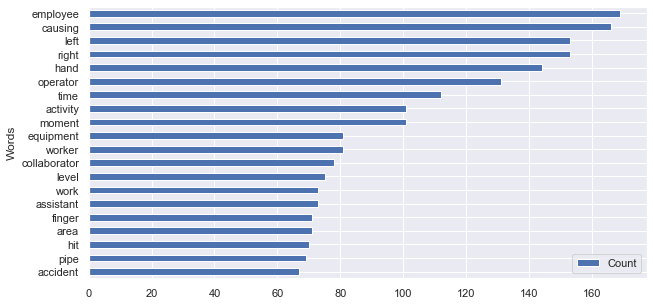

In [1579]:
uni_grams.sort_values(by='Count').plot.barh(figsize = (10,5));

#### Individual words having highest occurance include words like employee, causing, left, right, etc

#### Top 20 Bi-Grams (2 words frequently occuring together)

In [1580]:
bi_grams = top_ngrams(tokens, 2)

# Words and counts
bi_grams[0:20]

,Count
Words,
left hand,53
time accident,53
right hand,46
finger left,25
causing injury,24
employee report,22
hand causing,15
fragment rock,15
medical center,15


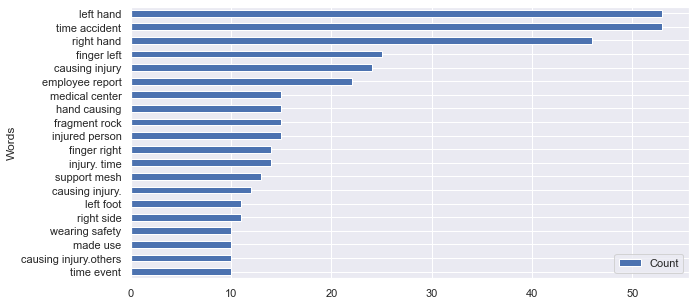

In [1581]:
bi_grams.sort_values(by='Count').plot.barh(figsize = (10,5));

#### Top 20 Tri-Grams (3 words frequently occuring together)

In [1582]:
tri_grams = top_ngrams(tokens, 3)

# Words and counts
tri_grams[0:20]

,Count
Words,
finger left hand,16
injury. time accident,13
finger right hand,10
time accident employee,9
left hand causing,6
time accident worker,6
right hand causing,6
causing injury described.others,5
worker wearing safety,5


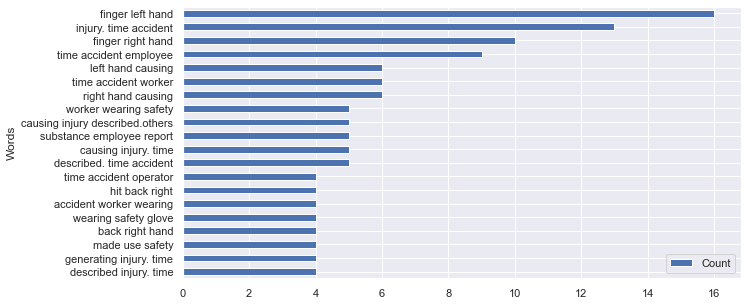

In [1583]:
tri_grams.sort_values(by='Count').plot.barh(figsize = (10,5));

In [1584]:
df.head(1)

,Accident_Level,Description,Length,Description_combined,description_final,NewDescription
0,1,While removing the drill rod of the Jumbo 08 f...,457,Pressed While removing the drill rod of the Ju...,pressed while removing the drill rod of the ju...,"While removing drill rod Jumbo maintenance, su..."


In [1585]:
#Again remove unwanted columns (last time)
df.drop(['Description', 'Length','Description_combined'], axis=1, inplace=True)

In [1586]:
df.drop('NewDescription', axis=1, inplace=True)

In [1587]:
df.head(1)

,Accident_Level,description_final
0,1,pressed while removing the drill rod of the ju...


#### Export csv having accident level and combination of critical risk with description 

In [1588]:
df.to_csv('Accidents_data_with_combined_description.csv')

#### Define input and target variable

In [1589]:
X = df['description_final']
y = df['Accident_Level']

#### Vectorize words

In [1590]:
vect = CountVectorizer(stop_words='english')

In [1591]:
#Feed data to CountVectorizer
X_vect = vect.fit_transform(X)

In [1592]:
#Check the vocabulary size
len(vect.vocabulary_)

3336

In [1593]:
vect.vocabulary_

{'pressed': 2320,
 'removing': 2483,
 'drill': 1122,
 'rod': 2560,
 'jumbo': 1720,
 '08': 40,
 'maintenance': 1909,
 'supervisor': 2934,
 'proceeds': 2344,
 'loosen': 1857,
 'support': 2938,
 'intermediate': 1672,
 'centralizer': 734,
 'facilitate': 1283,
 'removal': 2479,
 'seeing': 2652,
 'mechanic': 1965,
 'supports': 2941,
 'end': 1191,
 'equipment': 1219,
 'pull': 2380,
 'hands': 1501,
 'bar': 543,
 'accelerate': 358,
 'moment': 2008,
 'slides': 2743,
 'point': 2275,
 'tightens': 3031,
 'fingers': 1339,
 'drilling': 1125,
 'beam': 555,
 'pressurized': 2324,
 'systems': 2962,
 'activation': 384,
 'sodium': 2766,
 'sulphide': 2923,
 'pump': 2388,
 'piping': 2250,
 'uncoupled': 3138,
 'sulfide': 2919,
 'solution': 2774,
 'designed': 1028,
 'area': 481,
 'reach': 2430,
 'maid': 1906,
 'immediately': 1598,
 'use': 3165,
 'emergency': 1181,
 'shower': 2707,
 'directed': 1064,
 'ambulatory': 440,
 'doctor': 1105,
 'later': 1763,
 'hospital': 1569,
 'note': 2066,
 '48': 249,
 'grams': 147

In [1594]:
vect.get_feature_names()

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['001',
 '0010',
 '007',
 '01',
 '01022017',
 '01242017',
 '0130',
 '0150',
 '018',
 '0183',
 '02',
 '020317',
 '0210',
 '02152017',
 '02252017',
 '0250',
 '02bp0166',
 '02bp0167',
 '03',
 '031',
 '03222017',
 '04',
 '0400',
 '04042017',
 '04192017',
 '0420',
 '042tc06',
 '0430',
 '0450',
 '05',
 '050',
 '05022017',
 '05182017',
 '051917',
 '0530',
 '05m',
 '06',
 '069',
 '07',
 '07182016',
 '08',
 '08032017',
 '080616',
 '08fi0502',
 '09',
 '0945',
 '0m',
 '0x0',
 '10',
 '100',
 '1000',
 '100cm',
 '1015',
 '1020',
 '1025',
 '1040',
 '105',
 '1050',
 '1055',
 '1095',
 '10cm',
 '10cmx8cm',
 '10m',
 '10mx0',
 '10x6x5cm',
 '11',
 '110',
 '1100',
 '111',
 '112',
 '1122',
 '1125',
 '112gr',
 '113',
 '1130',
 '1145',
 '115',
 '1150',
 '116',
 '1170',
 '11b',
 '12',
 '120',
 '1205',
 '1220',
 '1225',
 '12cm',
 '12cmx10cmx3cm',
 '12inch',
 '13',
 '1305',
 '1340',
 '13cmx6cmx2cm',
 '14',
 '140',
 '1416',
 '142',
 '1425',
 '1440',
 '1445',
 '14th',
 '15',
 '1500',
 '1505',
 '1520',
 '1530',
 '15

#### Apply class balancing (since target variables are not balanced)

In [1595]:
y.value_counts()

1    309
2     40
3     31
4     30
5      8
Name: Accident_Level, dtype: int64

In [1596]:
#Using SMOTE for over sampling all classes
oversample = SMOTE()
X = df['description_final']
y = df['Accident_Level']

X_sm, y_sm = oversample.fit_resample(X_vect, y)

In [1597]:
y_sm.value_counts()

1    309
4    309
3    309
2    309
5    309
Name: Accident_Level, dtype: int64

#### Now classes are balanced

In [1598]:
X_sm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [1599]:
X_sm.shape

(1545, 3336)

In [1600]:
df_x = pd.DataFrame(X_sm.todense(), columns = vect.get_feature_names())

C:\Users\mridul.miglani\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1601]:
df_y = y_sm

In [1602]:
df_final = pd.concat([df_x,df_y], axis=1)

In [1603]:
df_final.shape

(1545, 3337)

In [1604]:
df_final.to_csv("Final_cleaned_file_for_model.csv")